## 해시태그 데이터로 워드클라우드 만들기

In [2]:
!apt-get install -y fonts-nanum > /dev/null
!fc-cache -fv > /dev/null
!rm -rf ~/.cache/matplotlib

In [1]:
from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]

Saving JejuHotPlace.csv to JejuHotPlace.csv


In [2]:
import pandas as pd
raw_df = pd.read_csv(filename)

In [3]:
raw_df.tags[:3]

0    ['#제주핫플레이스', '#제주여행', '#제주여행', '#제주도여행', '#제주가...
1    ['#제주핫플', '#제주여행', '#제주', '#제주도', '#제주도맛집', '#...
2    ['#honestin', '#어니스틴', '#제주여행', '#제주', '#제주도',...
Name: tags, dtype: object

In [4]:
tags = raw_df.tags[0]
tags

"['#제주핫플레이스', '#제주여행', '#제주여행', '#제주도여행', '#제주가볼만한곳', '#제주도핫플', '#제주여행코스', '#제주공항', '#제주도맛집', '#제주맛집', '#제주스냅', '#제주풍경', '#제주사진', '#제주카페', '#제주도카페', '#산굼부리', '#제주도바다', '#귤체험', '#우도', '#제주관광', '#제주도여향지', '#제주여행중', '#삼육오빠', '#제주앓이']"

In [5]:
tags[2:-2].split("', '")

['#제주핫플레이스',
 '#제주여행',
 '#제주여행',
 '#제주도여행',
 '#제주가볼만한곳',
 '#제주도핫플',
 '#제주여행코스',
 '#제주공항',
 '#제주도맛집',
 '#제주맛집',
 '#제주스냅',
 '#제주풍경',
 '#제주사진',
 '#제주카페',
 '#제주도카페',
 '#산굼부리',
 '#제주도바다',
 '#귤체험',
 '#우도',
 '#제주관광',
 '#제주도여향지',
 '#제주여행중',
 '#삼육오빠',
 '#제주앓이']

In [6]:
a = ['#시작']
a.append(tags[2:-2].split("', '"))
a

['#시작',
 ['#제주핫플레이스',
  '#제주여행',
  '#제주여행',
  '#제주도여행',
  '#제주가볼만한곳',
  '#제주도핫플',
  '#제주여행코스',
  '#제주공항',
  '#제주도맛집',
  '#제주맛집',
  '#제주스냅',
  '#제주풍경',
  '#제주사진',
  '#제주카페',
  '#제주도카페',
  '#산굼부리',
  '#제주도바다',
  '#귤체험',
  '#우도',
  '#제주관광',
  '#제주도여향지',
  '#제주여행중',
  '#삼육오빠',
  '#제주앓이']]

In [7]:
a = ['#시작']
a.extend(tags[2:-2].split("', '"))
a

['#시작',
 '#제주핫플레이스',
 '#제주여행',
 '#제주여행',
 '#제주도여행',
 '#제주가볼만한곳',
 '#제주도핫플',
 '#제주여행코스',
 '#제주공항',
 '#제주도맛집',
 '#제주맛집',
 '#제주스냅',
 '#제주풍경',
 '#제주사진',
 '#제주카페',
 '#제주도카페',
 '#산굼부리',
 '#제주도바다',
 '#귤체험',
 '#우도',
 '#제주관광',
 '#제주도여향지',
 '#제주여행중',
 '#삼육오빠',
 '#제주앓이']

In [8]:
tags_total = []

In [9]:
for tags in raw_df.tags:
    tags_total.extend(tags[2:-2].split("', '"))

### 해시태그 출현 빈도

#### Collection Module

In [10]:
from collections import Counter, OrderedDict

In [11]:
s = 'A quick brown fox jumps over the lazy dog.'
Counter(s)

Counter({' ': 8,
         '.': 1,
         'A': 1,
         'a': 1,
         'b': 1,
         'c': 1,
         'd': 1,
         'e': 2,
         'f': 1,
         'g': 1,
         'h': 1,
         'i': 1,
         'j': 1,
         'k': 1,
         'l': 1,
         'm': 1,
         'n': 1,
         'o': 4,
         'p': 1,
         'q': 1,
         'r': 2,
         's': 1,
         't': 1,
         'u': 2,
         'v': 1,
         'w': 1,
         'x': 1,
         'y': 1,
         'z': 1})

In [12]:
s1 = ['A', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog', '.']
Counter(s1)

Counter({'.': 1,
         'A': 1,
         'brown': 1,
         'dog': 1,
         'fox': 1,
         'jumps': 1,
         'lazy': 1,
         'over': 1,
         'quick': 1,
         'the': 1})

In [13]:
d = dict()
d['x'] = 1
d['k'] = 2
d['m'] = 3
d

{'k': 2, 'm': 3, 'x': 1}

In [14]:
od = OrderedDict()
od['x'] = 1
od['k'] = 2
od['m'] = 3
od

OrderedDict([('x', 1), ('k', 2), ('m', 3)])

In [15]:
for k, v in od.items():
    print(k, v)

x 1
k 2
m 3


#### 해시태그 빈도 집계

In [16]:
tag_counts = Counter(tags_total)

##### Top 50

In [17]:
tag_counts.most_common(50)

[('#제주맛집', 3412),
 ('#제주도맛집', 3149),
 ('#제주여행', 3020),
 ('#제주관광', 2827),
 ('#제주도', 2053),
 ('#제주', 1538),
 ('#제주도여행', 1454),
 ('#서귀포맛집', 1330),
 ('#제주도가볼만한곳', 1014),
 ('#제주핫플레이스', 835),
 ('#서귀포', 825),
 ('#jeju', 749),
 ('#일상', 701),
 ('#제주흑돼지맛집', 685),
 ('#제주맛집추천', 675),
 ('#제주도흑돼지맛집', 669),
 ('#제주도흑돼지', 663),
 ('#성산일출봉', 650),
 ('#제주흑돼지', 648),
 ('#협재맛집', 602),
 ('#제주카페', 600),
 ('#제주도그램', 594),
 ('#서귀포흑돼지맛집', 593),
 ('', 587),
 ('#서귀포흑돼지', 577),
 ('#제주도민', 570),
 ('#섭지코지', 556),
 ('#성산일출봉맛집', 545),
 ('#섭지코지맛집', 511),
 ('#선팔', 503),
 ('#제주가볼만한곳', 497),
 ('#통갈치구이', 494),
 ('#제주통갈치구이', 485),
 ('#제주핫플', 483),
 ('#제주살이', 480),
 ('#제주서귀포맛집', 479),
 ('#제주도민맛집', 477),
 ('#여행스타그램', 472),
 ('#제주반영구', 440),
 ('#제주도관광', 440),
 ('#여행', 436),
 ('#제주눈썹문신', 434),
 ('#서귀포눈썹문신', 420),
 ('#제주시', 419),
 ('#제주스타그램', 408),
 ('#반영구', 405),
 ('#눈썹문신', 405),
 ('#중문맛집', 404),
 ('#제주일상', 398),
 ('#제주자연눈썹', 397)]

##### 데이터 정제

In [19]:
stopwords = ['#jeju', '#일상', '',
             '#선팔', '#반영구',
             '#제주눈썹문신', '#서귀포눈썹문신',
             '#눈썹문신', '#제주반영구',
             '#제주', '#제주도',
             '#제주일상', '#제주자연눈썹',
             '#제주속눈썹', '#서귀포남자눈썹문신',
             '#서귀포자연눈썹', '#제주남자눈썹문신',
             '#서귀포속눈썹', '#서귀포반영구']
''' tag_total_refind = []
for tag in tags_total:
    if tag not in stopwords:
        tag_total_refind.append(tag) '''
tags_total = [tag for tag in tags_total if tag not in stopwords]
tag_counts = Counter(tags_total)
tag_counts.most_common(50)

[('#제주맛집', 3412),
 ('#제주도맛집', 3149),
 ('#제주여행', 3020),
 ('#제주관광', 2827),
 ('#제주도여행', 1454),
 ('#서귀포맛집', 1330),
 ('#제주도가볼만한곳', 1014),
 ('#제주핫플레이스', 835),
 ('#서귀포', 825),
 ('#제주흑돼지맛집', 685),
 ('#제주맛집추천', 675),
 ('#제주도흑돼지맛집', 669),
 ('#제주도흑돼지', 663),
 ('#성산일출봉', 650),
 ('#제주흑돼지', 648),
 ('#협재맛집', 602),
 ('#제주카페', 600),
 ('#제주도그램', 594),
 ('#서귀포흑돼지맛집', 593),
 ('#서귀포흑돼지', 577),
 ('#제주도민', 570),
 ('#섭지코지', 556),
 ('#성산일출봉맛집', 545),
 ('#섭지코지맛집', 511),
 ('#제주가볼만한곳', 497),
 ('#통갈치구이', 494),
 ('#제주통갈치구이', 485),
 ('#제주핫플', 483),
 ('#제주살이', 480),
 ('#제주서귀포맛집', 479),
 ('#제주도민맛집', 477),
 ('#여행스타그램', 472),
 ('#제주도관광', 440),
 ('#여행', 436),
 ('#제주시', 419),
 ('#제주스타그램', 408),
 ('#중문맛집', 404),
 ('#먹스타그램', 395),
 ('#맞팔', 388),
 ('#카멜리아힐', 379),
 ('#중문흑돼지맛집', 377),
 ('#소통', 374),
 ('#애월맛집', 373),
 ('#daily', 360),
 ('#제주메이크업', 358),
 ('#가족여행', 356),
 ('#제주도여행코스', 350),
 ('#jejuisland', 343),
 ('#성산맛집', 316),
 ('#셀카', 313)]

##### 막대그래프

In [ ]:
df2 = df[['tags_total', 'tags_counts']].sort_values(by='tags_counts', ascending=False)
df2.set_index('tags', inplace=True)
df2.head(20).sort_values(by='tags_count').plot(kind='barh', figsize=(12, 8))
plt.title('해시태그 빈도 집계')
plt.grid()
plt.show()

### 워드클라우드

In [20]:
from wordcloud import WordCloud

In [21]:
import matplotlib.pyplot as plt

In [22]:
!ls -l /usr/share/fonts/truetype/nanum

total 28836
-rw-r--r-- 1 root root 4413912 Dec  3  2017 NanumBarunGothicBold.ttf
-rw-r--r-- 1 root root 4184028 Dec  3  2017 NanumBarunGothic.ttf
-rw-r--r-- 1 root root 4642244 Dec  3  2017 NanumGothicBold.ttf
-rw-r--r-- 1 root root 4691820 Dec  3  2017 NanumGothic.ttf
-rw-r--r-- 1 root root 4183592 Dec  3  2017 NanumMyeongjoBold.ttf
-rw-r--r-- 1 root root 3839464 Dec  3  2017 NanumMyeongjo.ttf
-rw-r--r-- 1 root root  733500 Dec  3  2017 NanumSquareB.ttf
-rw-r--r-- 1 root root 1030948 Dec  3  2017 NanumSquareRoundB.ttf
-rw-r--r-- 1 root root 1063276 Dec  3  2017 NanumSquareRoundR.ttf
-rw-r--r-- 1 root root  723640 Dec  3  2017 NanumSquareR.ttf


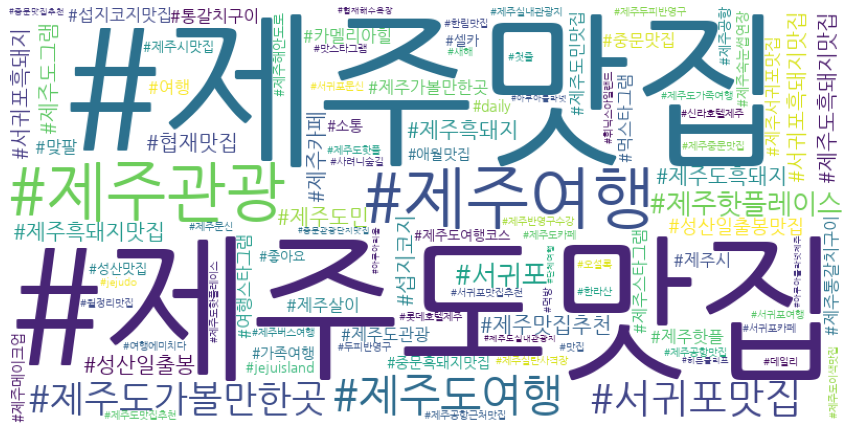

In [26]:
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
wordcloud = WordCloud(font_path=path,
                      background_color='white',
                      max_words=100,
                      relative_scaling=0.3,
                      width=800, height=400
                      ).generate_from_frequencies(tag_counts)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()